In [5]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = "/content/drive/MyDrive/ML3/praktikum/praktikum03/Data/socr.csv"

In [7]:
import pandas as pd
file_path= '/content/drive/MyDrive/ML3/praktikum/praktikum03/Data/socr.csv'
df = pd.read_csv(file_path)
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [9]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [10]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,         # in -> cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237      # lb -> kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [11]:
from sklearn.model_selection import train_test_split

# variabel independen/bebas
X = df1[["tinggi_cm"]]
# varibel dependen/terikat/target
y = df1["berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)
# cetak data train X
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


In [12]:
## Pemodelan Data : dengan data training
from sklearn.linear_model import LinearRegression
# Buat object model instan dari class linearRegression
model = LinearRegression()
# Lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ASUMSI: variabel 'model', 'X_test', dan 'y_test' sudah terdefinisi dari langkah sebelumnya

# prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Menghitung metrik error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Membuat DataFrame untuk merangkum hasil metrik
df_resume = pd.DataFrame({
    'R2': [r2],
    'Koefisien (kg/cm)': [model.coef_[0]],
    'Intersep (kg)': [model.intercept_],
    'MAE (kg)': [mae],
    'MSE (kg)': [mse],
    'RMSE (kg)': [rmse]
})

# Menampilkan hasil
df_resume

,R2,Koefisien (kg/cm),Intersep (kg),MAE (kg),MSE (kg),RMSE (kg)
0,0.249893,0.551823,-37.657089,3.670411,21.242938,4.609006


In [14]:
slope = model.coef_[0]
intercept = model.intercept_

# Perbaikan pada format string: gunakan kurung kurawal terpisah
print(f"persamaan: y = {slope:.3f}x + {intercept:.3f}")

persamaan: y = 0.552x + -37.657


# DATA TESTING DARI MAHASISWA


In [15]:
import pandas as pd
file_path= '/content/drive/MyDrive/ML3/praktikum/praktikum03/Data/dataMahasiswa.csv'
df_dataMahasiswa = pd.read_csv(file_path)
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [16]:
# Ambil Data X_testing
X_testing = df_dataMahasiswa['tinggi_cm']
X_testing

,tinggi_cm
0,175.5
1,162.0
2,180.2
3,155.0
4,170.8


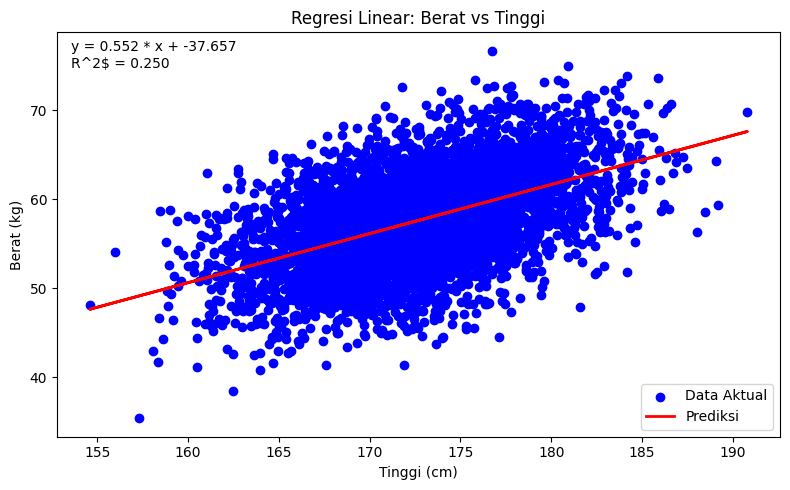

In [17]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")

plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")

# Menambahkan persamaan dan R^2 pada plot (Perlu variabel slope, intercept, r2 terdefinisi)
# Catatan: Variabel slope, intercept, dan r2 harus didefinisikan sebelum kode ini dijalankan
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\nR^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)

plt.legend()
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
# Asumsi 'model', 'X_test', dan 'y_test' sudah ada

# Prediksi model dengan data testing (Menggunakan nama variabel yang sama dengan gambar)
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
# Membuat denominator dengan mengganti nilai 0 pada 'Berat aktual (kg)' dengan NaN untuk menghindari pembagian dengan nol
denem = hasil["Berat aktual (kg)"].replace(0, np.nan)

# Menghitung Akurasi
# .abs() untuk nilai absolut error
# .clip(lower=0, upper=1) untuk memastikan rasio error/aktual berada di antara 0 dan 1
hasil["Akurasi (%)"] = (
    1 - (hasil["Selisih error (kg)"].abs() / denem)
).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762990,8.602990,82.848904
1,171.31,50.33,56.875754,6.545754,86.994329
2,169.29,58.22,55.761071,-2.458929,95.776488
3,163.30,58.92,52.455650,-6.464350,89.028598
4,170.52,63.06,56.439814,-6.620186,89.501766
...,...,...,...,...,...
4995,178.75,56.59,60.981319,4.391319,92.240114
4996,163.05,47.45,52.317694,4.867694,89.741425
4997,166.51,52.46,54.227003,1.767003,96.631715
4998,167.70,49.90,54.883672,4.983672,90.012681


In [19]:
import pandas as pd
file_path= '/content/drive/MyDrive/ML3/praktikum/praktikum03/Data/stunting_wasting_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [20]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [21]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
    .rename(columns={"Jenis Kelamin":"jk",
                     "Umur (bulan)":"umur_bln",
                     "Tinggi Badan (cm)": "tinggi_cm",
                     "Berat Badan (kg)": "berat_kg"})
    .copy()
)

## Laki-Laki: 1, Perempuan: 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})

df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [22]:
from inspect import CORO_RUNNING
# Hitung matrick korelasi
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


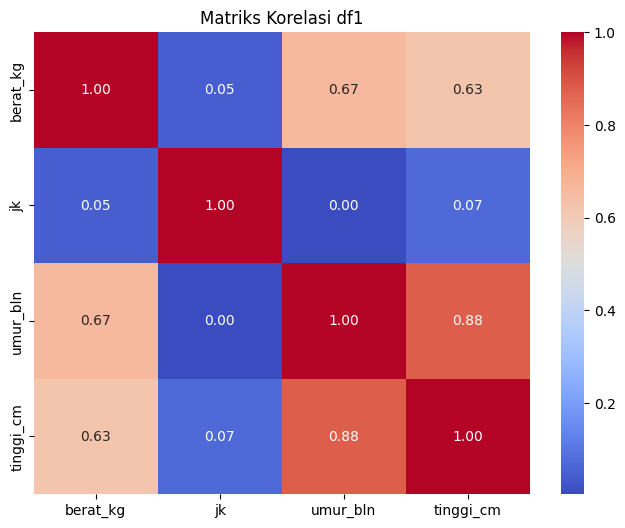

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

# Membagi dataset untuk Training dan Test


In [24]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan, # Variabel dependen
y = df1["berat_kg"]

# Fitur (X) adalah umur dan tinggi, # Variabel independen
X = df1[["umur_bln", "tinggi_cm"]]

# Bagi data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 # random_state supaya hasil konsisten
)

## Cetak Pembagian Data
print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

## cek apakah sudah ada constanta pada data training
X_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,umur_bln,tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


# PEMODELAN


In [25]:
import statsmodels.api as sm

## Tambahkan Konstanta
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,umur_bln,tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5
